# Práctica 04: Antenas de apertura

In [3]:
%matplotlib notebook
import numpy as np  # cálculo numérico
import matplotlib.pyplot as plt  # gráficos
import matplotlib.transforms as mtransforms
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.colors as mcolors
import scipy.special as sc
import sympy as sp
from sympy.vector import CoordSys3D # para trabajar con vectores
N = CoordSys3D('N') # Sistema de coordenadas de referencia 
# (los vectores unitarios para x,y,z son N.i,N.j,N.k)
from sympy import fourier_transform

## Corrientes equivalentes en la apertura para incidencia frontal

Esta apertura cuadrada se usará como base para los siguientes ejercicios.
El campo incidente con fasores de campo eléctrico $E_i$ y magnético $H_i$
corresponde a una onda plana que se propaga desde x<0 hacia x>0 a
través de la apertura realizada en un plano conductor perfecto. La
onda plana incidente tiene vector de propagación
$\vec{\rm{\beta}}$. Cuando $\vec{\rm{\beta}}$ es paralelo a
$\hat{\mathbf{x}}$ diremos que la incidencia es frontal, con el frente
de ondas coplanar con la apertura. Con incidencia oblicua la dirección
de llegada de la onda plana puede tener una inclinación arbitraria
$(\theta,\phi)$.
<img src="figuras/apertura_yz.svg" alt="apertura" class="bg-primary mb-1" width="500px">

Lo primero que tenemos que hacer es calcular las corrientes
equivalentes en la superficie de la apertura en la condiciones
siguientes:

- Incidencia frontal, asumimos iluminación uniforme en la apertura,
  como si los campos no fueran perturbados por la apertura
- El campo eléctrico en la apertura será por tanto constante e igual a
  $E_0 \hat{\mathbf{z}}$
- Los vectores unitarios
  $\hat{\mathbf{x}},\hat{\mathbf{y}},\hat{\mathbf{z}}$ son N.i,N.j,N.k
  y se muestran en el dibujo de la apertura
- Recordar que en sympy el producto vectorial se puede representar
  mediante el símbolo ^
- Versión del teorema de equivalencia: rellenando con PEC y aplicando
  imágenes

In [4]:
def respuesta_01():
    # M_ss Densidad de corriente magnética superficial
    # Símbolos a utilizar, no hacen falta todos
    E_0, H_0, a, k_x, k_y, k_z, x, y, z=sp.symbols('E_0 H_0 a k_x k_y k_z x y z') 
    # Edita a partir de aquí
    
    #Densidad de corriente segun teorema de equivalencia
    Ms = -N.i^(E_0*N.k)
    
    #Aplicando relleno PEC
    M_ss=2*Ms
    
    return M_ss

respuesta_01()

2*E_0*N.j

## Diagrama normalizado de apertura cuadrada con iluminación frontal

Se parte de la apertura del dibujo anterior. Asumimos apertura
cuadrada de lado 3 longitudes de onda. Tenemos iluminación frontal, es
decir el frente de onda de la onda plana incidente es coplanar con la
apertura. Se desea representar el diagrama de radiación normalizado,
empleando [dB] y mostrando valores de 0 a -30 dB de atenuación

<IPython.core.display.Javascript object>


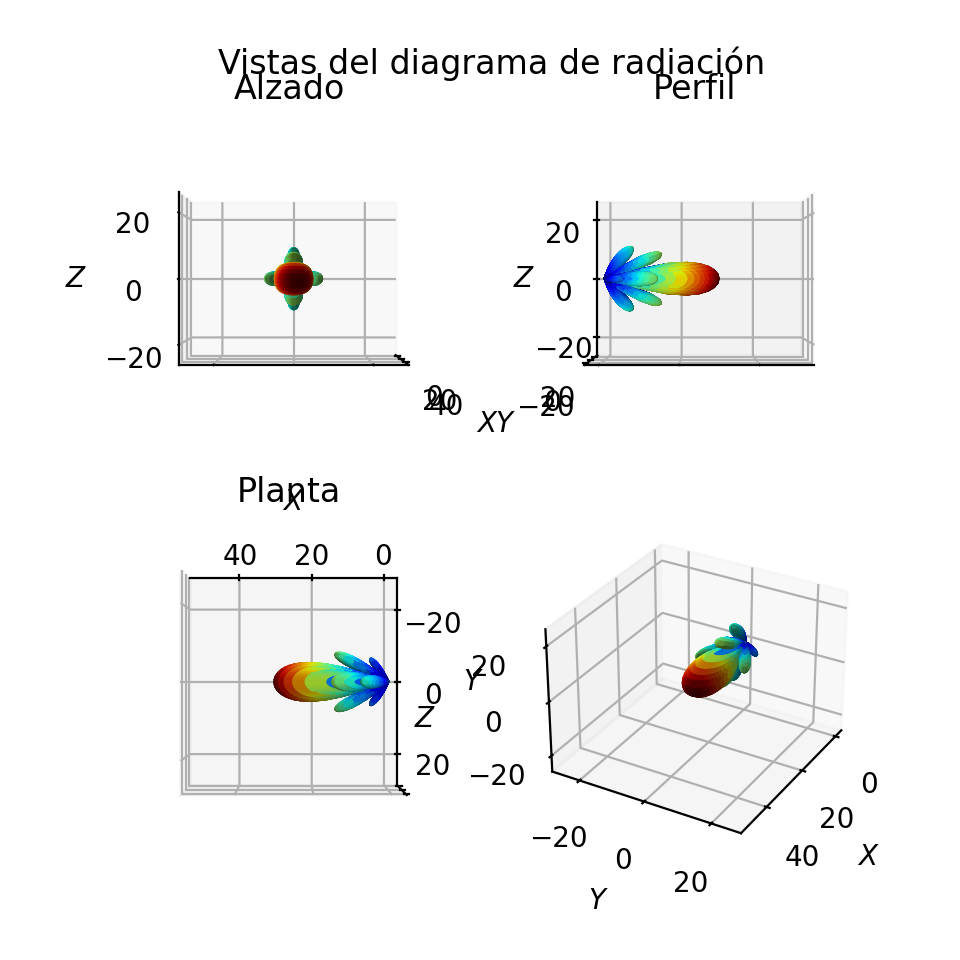

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

In [5]:
def respuesta_02():
    # El objetivo de esta función es devolver 4 matrices con 
    # la superficie mallada para alimentar plot_surface:
    # X la matriz de coordenadas X de los parches a representar
    # Y la matriz de coordenadas Y de los parches a representar
    # Z la matriz de coordenadas Z de los parches a representar
    # R_log la distancia de cada punto de la malla al origen 
    # (para colorear cada parche en consecuencia)
    # Representamos únicamente en x>0, 70 segmentos en theta y
    # 140 segmentos en phi

    from numpy import sin,cos,sinc,pi, max, log10
    π=pi
    # Editar a partir de aquí
    t = np.linspace(0,np.pi, 71)  
    p = np.linspace(-np.pi/2, np.pi/2, 141)
    θ,ϕ = np.meshgrid(t,p)
   
    lado = 3
    # Para calcular la k usamos k = 2pi/lambda lambda = a/3 k = 6π/a
    k = 6*π
    
    k_y = k*sin(θ)*sin(ϕ)
    k_z = k*cos(θ)
    
    # Calculamos el vector de radiación ayudándonos del teorema de equivalencia como en el apartado anterior
    # y de las expresiones generales de los campos radiados
    L =  sinc(k_y/(2*pi)) * sinc(k_z/(2*pi))
    
    # Paso a coordenadas esféricas
    L_θ = L * cos(θ) * sin(ϕ)
    L_ϕ = L * cos(ϕ)
    
    R = ((abs(L_θ))**2 + (abs(L_ϕ))**2)
    R_norm = R / max(abs(R))
    
    # Pasamos a dB y normalizamos con respecto a -30dB
    R_log = 10*log10(R_norm)
    R_log[R_log < -30] = -30
    R_log = R_log +30
    
    # Paso a cartesianas
    X = R_log*sin(θ)*cos(ϕ)
    Y = R_log*sin(θ)*sin(ϕ)
    Z = R_log*cos(θ)
    
    return X,Y,Z,R_log

from ftrlearn04 import muestra_vistas, muestra_vista
muestra_vistas(muestra_vista,X=respuesta_02()[0],Y=respuesta_02()[1],Z=respuesta_02()[2],R_log=respuesta_02()[3])

## Alimentación uniforme de la apertura, fase progresiva debida a incidencia oblicua

Suponemos ahora que el vector de propagación de la onda plana
incidente está contenido en el plano XZ. En el origen de coordenadas
está dirigido hacia la dirección $(\theta=\pi/3,\phi=0)$. La onda
incidente viene desde las coordenadas x negativas hacia la
apertura. La longitud de onda es 0,3 [m]. Aproximamos el campo
incidente en la apertura por el campo que existiría en esa superficie
en espacio libre, sin colocar la apertura.

El objetivo ahora consiste en expresar la fase en radianes en cada
punto de la superficie de la apertura. Tomamos como referencia una
fase nula en el centro de la apertura en (x=0,y=0,z=0).

In [ ]:
def respuesta_03():   
    # fase: esta función devuelve la fase en radianes evaluada en una muestreo de puntos
    # de la apertura
    
    # Establecemos el muestreo en (x=0,y,z) de los puntos de la apertura
    x = np.linspace(-0.3*1.5,0.3*1.5, 51)
    y = np.linspace(-0.3*1.5,0.3*1.5, 51)
    z = np.linspace(-0.3*1.5,0.3*1.5, 51)
    from numpy import cos,sin,sinc,exp
    Y,Z=np.meshgrid(y,z)
    # Edita a partir de aquí
    
    from numpy import meshgrid, cos, sin, pi
    
    # Definimos los parámetros necesarios
    θ = pi / 3
    ϕ = 0
    λ = 0.3
    
    # El vector de propagación está en el plano XZ. Como se está evaluando en el plano
    # YZ, solo la componente Z del vector de propagación contribuirá a la fase
    fase = -(2*pi / λ) * cos(θ) * Z
    
    return fase

# Para mostrar vuestra respuesta visualmente ejecutad la celda siguiente

In [ ]:
from ftrlearn04 import muestra_respuesta_03
muestra_respuesta_03(respuesta_03())

## Apertura cuadrada con incidencia oblicua estática

Como en la pregunta anterior el vector de propagación de la onda
incidente está contenido en el plano XZ.

En el origen apunta en la dirección $(\theta=\pi/3,\phi=0)$. Se desea
representar el diagrama de radiación normalizado, empleando [dB] y
mostrando valores de 0 a -30 dB de atenuación

<IPython.core.display.Javascript object>


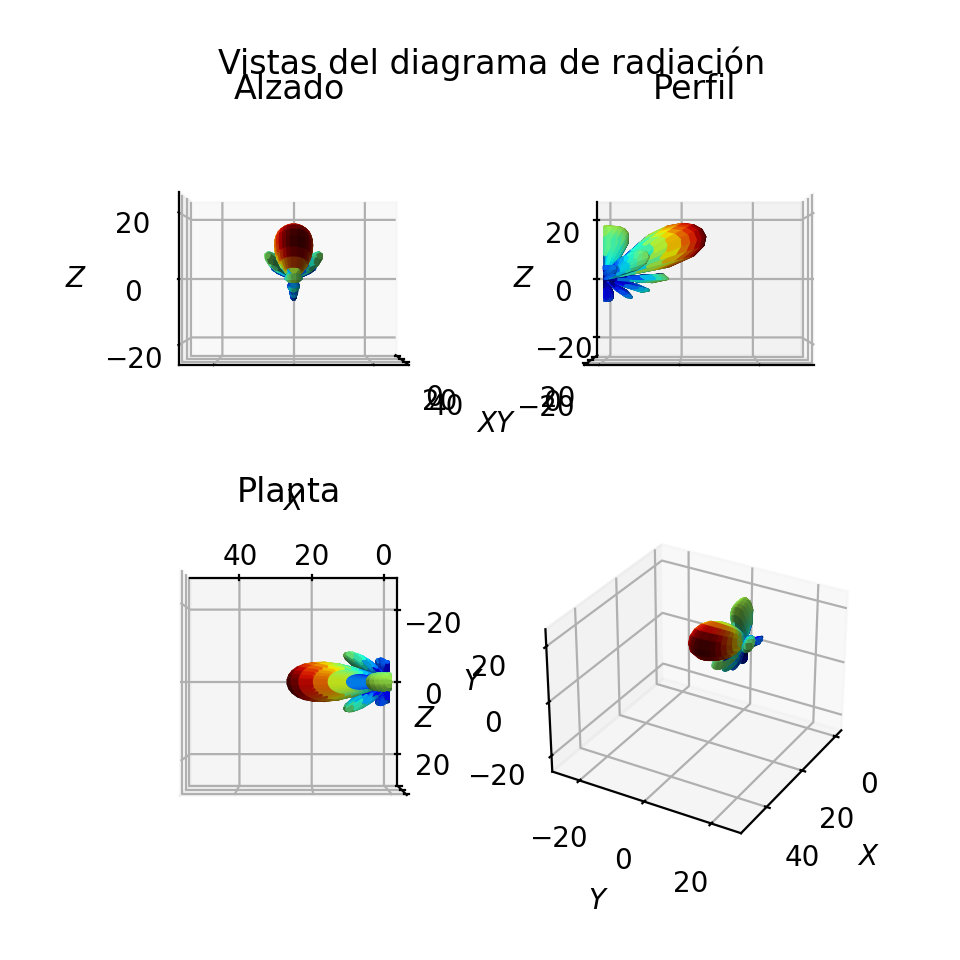

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

In [6]:
def respuesta_04():
    # El objetivo de esta función es devolver cuatro matrices
    # que describen la superficie mallada para plot_surface:
    # X la matriz de coordenadas X de los parches a representar
    # Y la matriz de coordenadas Y de los parches a representar
    # Z la matriz de coordenadas Z de los parches a representar
    # R_log la distancia de cada punto de la malla al origen 
    # (para colorear cada parche en consecuencia)
    from numpy import sin,cos,sinc,pi, abs, clip, max, log10
    π=pi
    t = np.linspace(0,π, 41)
    p = np.linspace(-π/2,π/2, 74)
    # Hacemos mallado de puntos theta y phi
    #Hacemos mallado de puntos theta y phi
    θ,ϕ = np.meshgrid(t,p)
    
    # Editar a partir de aquí

    # Definimos los parámetros necesarios
    θ_inc = (pi / 3)
    ϕ_inc = 0
    k = 6*π
    
    # Hallamos el vector de radiación
    k_z = k * (cos(θ)-cos(θ_inc))
    k_y = k * (sin(θ)*sin(ϕ) - sin(θ_inc)*sin(ϕ_inc))
    L = sinc(k_z/(2*π))*sinc(k_y/(2*π))
    
    # Paso a coordenadas esféricas
    L_θ = L*cos(θ)*sin(ϕ)
    L_ϕ = L*cos(ϕ)
    
    # Hallamos el diagrama de radiación
    R = abs(L_θ)**2 + abs(L_ϕ)**2
    
    # Pasamos a dB y ajustamos para mantener los valores entre 0 y -30dB
    R_log = 10*log10(R)      
 
    R_log[R_log < -30] = -30
    R_log = R_log +30
                       
    #Pasamos theta y phi a cartesianas(obtenemos todos los puntos para las mallas)
    X = R_log*sin(θ)*cos(ϕ)
    Y = R_log*sin(θ)*sin(ϕ)
    Z = R_log*cos(θ)
  
    return X,Y,Z,R_log

from ftrlearn04 import muestra_vistas, muestra_vista
muestra_vistas(muestra_vista,X=respuesta_04()[0],Y=respuesta_04()[1],Z=respuesta_04()[2],R_log=respuesta_04()[3])

## Antena parabólica

Un paraboloide de revolución se alimenta en el foco con una
antena de diagrama de radiación
\begin{eqnarray}
D(\theta,\phi)= \left\{ {\begin{array}{*{20}lcl}
   6\cos^2(\theta) & & 0\leq \theta\leq \frac{\pi}{2} \\
   0 & & \theta>\frac{\pi}{2}  \\
 \end{array} } \right.
\end{eqnarray}

- Calcular la eficiencia de desbordamiento en función de $\beta$ (para el intervalo $30°\leq\beta\leq
90°)$

In [ ]:
def respuesta_05():
    β = np.arange(30, 90,0.1) 
    from numpy import cos,sin,tan
    # Edita a partir de aquí
    
    #Formula 4.7.39, la integral de phi la podemos dejar en 2pi debido a que no la tenemos presente en el diagrama
    #haciendo la integral de theta nos deja cos(θ)**3/3 para evaluar entre β y 0 al calcularlo da 1-cos**3(β)
    #Hay que pasar la θ a radianes
    
    neta_s = 1-cos(β*np.pi/180)**3
    
    return neta_s     

respuesta_05()